In [1]:
#from natsort import natsorted, ns
import pickle
#import csv
import numpy as np
#from load_mol2_data import *
import os
from math import *
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
def norm_data(data):
    result = []
    for i in data:
        result.append((float(i)-min(data))/(max(data)-min(data)))
    return result

In [3]:
def mirror_data(data):
    result = []
    for points in data:
        points = points + points.T - np.diag(np.diag(points))
        result.append(points)
    #print(np.asarray(result).shape)
    return np.asarray(result)

In [4]:
def diag_data(data):
    results = {"eigenvalues":[], "eigenvectors": []}
    for points in data:
        values, vectors = np.linalg.eig(points)
        results["eigenvalues"].append(values)
        results["eigenvectors"].append(vectors)
    return results

In [5]:
def square_mat(data):
    result = []
    for points in data:
        points = np.square(points)
        result.append(points)
    return np.asarray(result)

In [6]:
"""


The Hamiltonian construction:

H =     [ E620  J       J       J   ]
        [       E610    J       J   ]
        [               E611    J   ]
        [                       E612]

        

"""

'\n\n\nThe Hamiltonian construction:\n\nH =     [ E620  J       J       J   ]\n        [       E610    J       J   ]\n        [               E611    J   ]\n        [                       E612]\n\n        \n\n'

In [7]:
data = np.load('Hamiltonian_result7.npy')
"""
Testing mirror function, get the bottom triangle of the Hamiltonian Matrix
"""

mirrored = mirror_data(data)
np.set_printoptions(suppress=True)
print(mirrored.shape)
np.set_printoptions(suppress=False)

for points in mirrored:
    print(points.shape)
    break

print(mirrored[0])

(1000, 4, 4)
(4, 4)
[[ 1.50000000e+04 -1.05105775e+01  6.01246445e+00 -9.11099727e+00]
 [-1.05105775e+01  1.49000000e+04 -2.42976124e+01  1.70931106e+01]
 [ 6.01246445e+00 -2.42976124e+01  1.49000000e+04  1.19081825e+02]
 [-9.11099727e+00  1.70931106e+01  1.19081825e+02  1.49000000e+04]]


In [8]:
data_diagnalized = diag_data(mirrored)

In [9]:
values = np.asarray(data_diagnalized["eigenvalues"])
vectors = np.asarray(data_diagnalized["eigenvectors"])
#values.shape
np.save("eigenvalues.npy", values)
np.save("eigenvectors.npy", vectors)

In [10]:
J620_610 = data[:,0,1]
J620_611 = data[:,0,2]
J620_612 = data[:,0,3]
J610_611 = data[:,1,2]
J610_612 = data[:,1,3]
J611_612 = data[:,2,3]


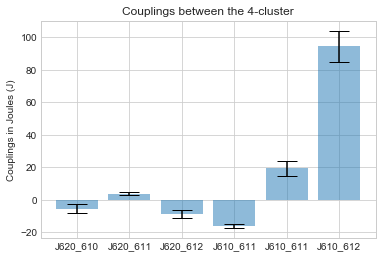

In [11]:
couplings = ["J620_610","J620_611","J620_612","J610_611","J610_611","J610_612","J611_612"]

x_pos = np.arange(1,len(couplings))
CTEs = [np.mean(J620_610),np.mean(J620_611),np.mean(J620_612),np.mean(J610_611),np.mean(J610_612),np.mean(J611_612)]
error = [np.std(J620_610),np.std(J620_611),np.std(J620_612),np.std(J610_611),np.std(J610_612),np.std(J611_612)]

fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Couplings in Joules (J)')
ax.set_xticks(x_pos)
ax.set_xticklabels(couplings)
ax.set_title('Couplings between the 4-cluster')
ax.yaxis.grid(True)


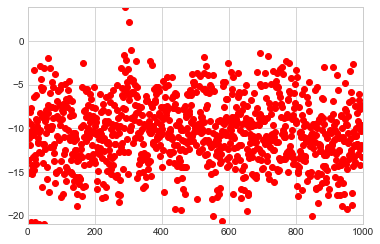

In [12]:
#This is sum

coupling_sum = np.add(data[:,0,1],data[:,0,2])
coupling_sum = np.add(coupling_sum,data[:,0,3])


plt.plot(np.arange(0,1000), coupling_sum, 'ro')
plt.axis([0, 1000, min(coupling_sum), max(coupling_sum)])
plt.show()


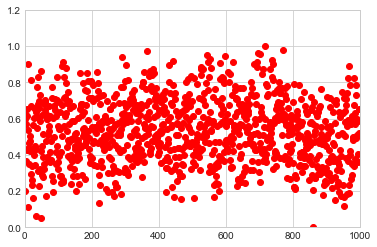

In [13]:
plt.plot(np.arange(0,1000), norm_data(data[:,0,1]), 'ro')
plt.axis([0, 1000, 0, 1.2])
plt.show()


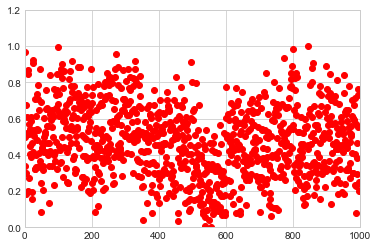

In [14]:
plt.plot(np.arange(0,1000), norm_data(data[:,0,2]), 'ro')
plt.axis([0, 1000, 0, 1.2])
plt.show()


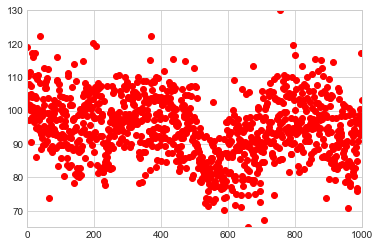

In [15]:
plt.plot(np.arange(0,1000), data[:,2,3], 'ro')
plt.axis([0, 1000, min(data[:,2,3]), max(data[:,2,3])])
plt.show()


(14300, 15400)

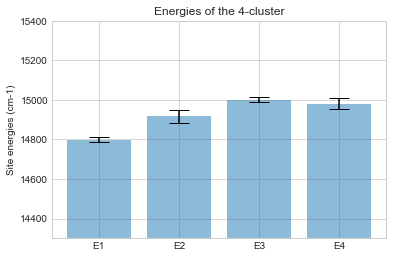

In [16]:
"""
Energy of the 4 cluster: Lut620, CLA610, CLA611, CLA612
In a bar chart with error bar:

"""

E620, E610, E611, E612 = values.T    #unpack the eigenvalues to 4 variables.

#print(E620)

site_energies = ["E1", "E2", "E3", "E4"]

x_pos = np.arange(len(site_energies))
CTEs = [np.mean(E620),np.mean(E610),np.mean(E611),np.mean(E612)]
error = [np.std(E620),np.std(E610),np.std(E611),np.std(E612)]

fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Site energies (cm-1)')
ax.set_xticks(x_pos)
ax.set_xticklabels(site_energies)
ax.set_title('Energies of the 4-cluster')
ax.yaxis.grid(True)
ax.set_ylim([14300, 15400])


In [17]:
sq_vector = square_mat(vectors)
print(sq_vector[1])

[[0.00143806 0.01006934 0.347031   0.64146161]
 [0.06296907 0.92909152 0.00154774 0.00639167]
 [0.46826428 0.02648327 0.2985307  0.20672174]
 [0.46732859 0.03435587 0.35289056 0.14542498]]


In [18]:
"""


              E1    E2      E3      E4
Vectors =   [ contr J       J       J   ]
            [       E610    J       J   ]
            [               E611    J   ]
            [                       E612]

        

"""

'\n\n\n              E1    E2      E3      E4\nVectors =   [ contr J       J       J   ]\n            [       E610    J       J   ]\n            [               E611    J   ]\n            [                       E612]\n\n        \n\n'

0.4702599203959235


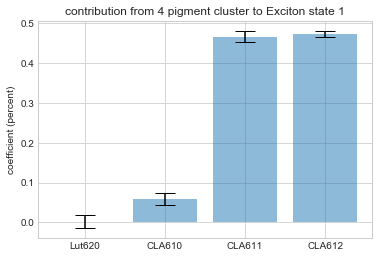

In [19]:
#Plotting excitonic state 1 (E1) here:

co_lut620, co_cla610, co_cla611, co_cla612 = sq_vector[:,:,0].T

print(co_cla612[0])
coefficient = ["Lut620", "CLA610", "CLA611", "CLA612"]

x_pos = np.arange(len(coefficient))
CTEs = [np.mean(co_lut620),np.mean(co_cla610),np.mean(co_cla611),np.mean(co_cla612)]
error = [np.std(co_lut620),np.std(co_cla610),np.std(co_cla611),np.std(co_cla612)]

fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('coefficient (percent)')
ax.set_xticks(x_pos)
ax.set_xticklabels(coefficient)
ax.set_title('contribution from 4 pigment cluster to Exciton state 1')
ax.yaxis.grid(True)
#ax.set_ylim([14600, 15400])

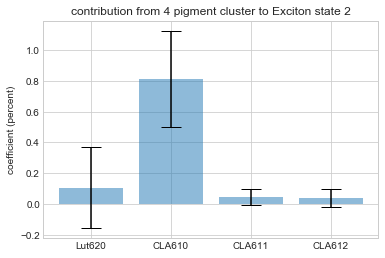

In [20]:
#Plotting excitonic state 2 (E2) here:

co_lut620, co_cla610, co_cla611, co_cla612 = sq_vector[:,:,1].T

coefficient = ["Lut620", "CLA610", "CLA611", "CLA612"]

x_pos = np.arange(len(coefficient))
CTEs = [np.mean(co_lut620),np.mean(co_cla610),np.mean(co_cla611),np.mean(co_cla612)]
error = [np.std(co_lut620),np.std(co_cla610),np.std(co_cla611),np.std(co_cla612)]

fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('coefficient (percent)')
ax.set_xticks(x_pos)
ax.set_xticklabels(coefficient)
ax.set_title('contribution from 4 pigment cluster to Exciton state 2')
ax.yaxis.grid(True)
#ax.set_ylim([14600, 15400])

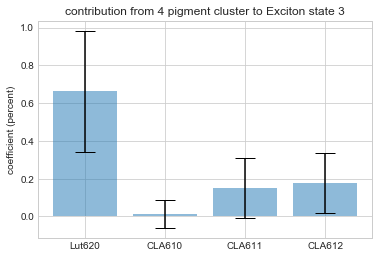

In [21]:
#Plotting excitonic state 3 (E3) here:

co_lut620, co_cla610, co_cla611, co_cla612 = sq_vector[:,:,2].T

coefficient = ["Lut620", "CLA610", "CLA611", "CLA612"]

x_pos = np.arange(len(coefficient))
CTEs = [np.mean(co_lut620),np.mean(co_cla610),np.mean(co_cla611),np.mean(co_cla612)]
error = [np.std(co_lut620),np.std(co_cla610),np.std(co_cla611),np.std(co_cla612)]

fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('coefficient (percent)')
ax.set_xticks(x_pos)
ax.set_xticklabels(coefficient)
ax.set_title('contribution from 4 pigment cluster to Exciton state 3')
ax.yaxis.grid(True)
#ax.set_ylim([14600, 15400])

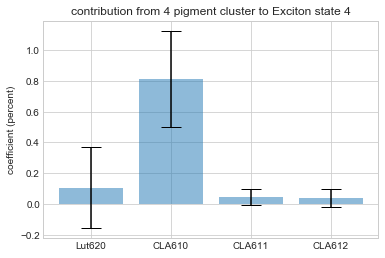

In [22]:
#Plotting excitonic state 4 (E4) here:

co_lut620, co_cla610, co_cla611, co_cla612 = sq_vector[:,:,1].T

coefficient = ["Lut620", "CLA610", "CLA611", "CLA612"]

x_pos = np.arange(len(coefficient))
CTEs = [np.mean(co_lut620),np.mean(co_cla610),np.mean(co_cla611),np.mean(co_cla612)]
error = [np.std(co_lut620),np.std(co_cla610),np.std(co_cla611),np.std(co_cla612)]

fig, ax = plt.subplots()

ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('coefficient (percent)')
ax.set_xticks(x_pos)
ax.set_xticklabels(coefficient)
ax.set_title('contribution from 4 pigment cluster to Exciton state 4')
ax.yaxis.grid(True)
#ax.set_ylim([14600, 15400])

In [23]:
def plot_contribution(vector,name1,name2):
    if name1 == "LUT620":
        a = 0
    elif name1 == "CLA610":
        a = 1
    elif name1 == "CLA611":
        a = 2
    elif name1 == "CLA612":
        a = 3
    if name2 == "LUT620":
        b = 0
    elif name2 == "CLA610":
        b = 1
    elif name2 == "CLA611":
        b = 2
    elif name2 == "CLA612":
        b = 3
    plt.plot(np.arange(0,1000), abs(vector[:,a,b]), 'ro')
    plt.axis([0, 1000, 0, 1])
    plt.show()
    return

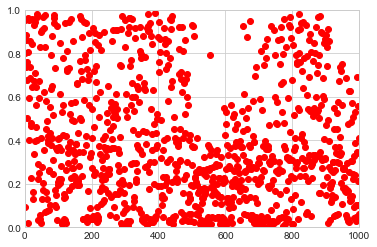

In [24]:
plot_contribution(vectors, "LUT620", "CLA612")